# Final Project Python for Data Analysis : 
## Online Shoppers Purchasing Intention Dataset Data Set

### DIA 1 
### Taous Bedouhene, Inès Baazia, Elise Barbier

The link of the website to find our dataset : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The link to download the dataset : 
https://archive.ics.uci.edu/ml/machine-learning-databases/00468/

In [147]:
# All the library used
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Download and exploration of the dataset

In [148]:
df = pd.read_csv('online_shoppers_intention.csv',sep = ',')

In [149]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [150]:
df.shape

(12330, 18)

In [151]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Cleaning

In [153]:
df['Month'].astype(str)

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12330, dtype: object

In [154]:
df['VisitorType'].astype(str)

0        Returning_Visitor
1        Returning_Visitor
2        Returning_Visitor
3        Returning_Visitor
4        Returning_Visitor
               ...        
12325    Returning_Visitor
12326    Returning_Visitor
12327    Returning_Visitor
12328    Returning_Visitor
12329          New_Visitor
Name: VisitorType, Length: 12330, dtype: object

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data pre-processing

# Imputation

Imputation is the process of assigning replacement values ​​to missing, invalid, or inconsistent data that is rejected at the data verification stage.

Having a missing value in a machine learning model is considered very inefficient and dangerous for the following reasons:

* Reduces the efficiency of the ML model
* Affects the overall distribution of data values
* This leads to a biased effect in the estimation of the ML model

This is where imputation comes into play. By imputation, we mean replacing missing or null values ​​with a particular value in the data set.

In [156]:
df.sum()

Administrative                                                         28546
Administrative_Duration                                               996493
Informational                                                           6209
Informational_Duration                                                425045
ProductRelated                                                        391249
ProductRelated_Duration                                          1.47312e+07
BounceRates                                                           273.62
ExitRates                                                            531.088
PageValues                                                           72614.5
SpecialDay                                                             757.4
Month                      FebFebFebFebFebFebFebFebFebFebFebFebFebFebFebF...
OperatingSystems                                                       26189
Browser                                                                29063

Before imputing the missing data values, it is necessary to check and detect the presence of missing values ​​using the isnull() function as shown below:

In [157]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In our case, there are no missing values, so imputation is not feasible.

## Normalization

In [158]:
df_norm = df.copy()

In [159]:
df_norm['Moyenne_Administrative'] = df_norm['Administrative_Duration']/df_norm['Administrative']

In [160]:
column = 'Moyenne_Administrative'
df_norm[column] = MinMaxScaler().fit_transform(np.array(df_norm[column]).reshape(-1,1))

In [161]:
df_norm["Moyenne_Administrative"].fillna("0", inplace = True)

In [162]:
display(df_norm)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.0308524
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.0119686


For the colomne Moyenne Informational

In [163]:
df_norm['Moyenne_Informational'] = df_norm['Informational_Duration']/df_norm['Informational']

In [164]:
df_norm

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,NaN
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,NaN
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,NaN
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,NaN
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.0308524,NaN
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0,NaN
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,0,NaN
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.0119686,NaN


In [165]:
df_norm["Moyenne_Informational"].fillna("0", inplace = True)

In [166]:
df_norm

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.0308524,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.0119686,0


In [167]:
df_norm2 = df_norm.copy()

In [168]:
column1 = 'Moyenne_Informational'
df_norm2[column1] = MinMaxScaler().fit_transform(np.array(df_norm2[column1]).reshape(-1,1))

In [169]:
display(df_norm2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.0308524,0.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0,0.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,0,0.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.0119686,0.0


Pour la colonne Moyenne ProductRelated

In [170]:
df_norm2['Moyenne_ProductRelated'] = df_norm2['ProductRelated_Duration']/df_norm2['ProductRelated']

In [171]:
df_norm2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0.0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0.0,32.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0.0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0.0,1.333333
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,True,False,0.0308524,0.0,33.656447
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,True,False,0,0.0,93.150000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,True,False,0,0.0,30.708333
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,False,False,0.0119686,0.0,23.066667


In [172]:
df_norm2["Moyenne_ProductRelated"].fillna("0", inplace = True)

In [173]:
df_norm2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0.0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0.0,32
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0.0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0.0,1.33333
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0.0,62.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,True,False,0.0308524,0.0,33.6564
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,True,False,0,0.0,93.15
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,True,False,0,0.0,30.7083
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,False,False,0.0119686,0.0,23.0667


In [174]:
df_norm3 = df_norm2.copy()

In [175]:
column3 = 'Moyenne_ProductRelated'
df_norm3[column3] = MinMaxScaler().fit_transform(np.array(df_norm3[column3]).reshape(-1,1))

In [176]:
display(df_norm3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0.0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0.0,0.022679
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0.0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0.0,0.000945
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0.0,0.044472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,True,False,0.0308524,0.0,0.023853
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,True,False,0,0.0,0.066017
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,True,False,0,0.0,0.021764
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,False,False,0.0119686,0.0,0.016348


## Encoding

We separate the numeric and categorical columns into two new data sets

In [177]:
df_numerical = df_norm3[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']]
df_categorical = df_norm3[['Month','VisitorType','Weekend','Revenue']]

We look at the different unique values for categorical values :

In [178]:
print(df_norm3['Month'].unique())
print(df_norm3['VisitorType'].unique())
print(df_norm3['Weekend'].unique())
print(df_norm3['Revenue'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]
[False  True]


We realize that January and April are missing. We transform the months by their number :

In [179]:
month_num = {
'Feb' : 2,
'Mar' : 3,
'May' : 5,
'June': 6,
'Jul' : 7,
'Aug' : 8,
'Sep' : 9,
'Oct' : 10,
'Nov' : 11,
'Dec' : 12,}

In [180]:
df_norm3["mois"] = df_norm3.Month.map(month_num)
df_norm3[['Month',"mois",]]

,Month,mois
0,Feb,2
1,Feb,2
2,Feb,2
3,Feb,2
4,Feb,2
...,...,...
12325,Dec,12
12326,Nov,11
12327,Nov,11
12328,Nov,11


We encode the weekend and revenue values into binary :

In [181]:
weekend_encoder = LabelEncoder()
weekend_encoder.fit(df_categorical['Weekend'])

LabelEncoder()

In [182]:
df_norm3['weekend_values'] = weekend_encoder.transform(df_categorical['Weekend'])
df_norm3[['Weekend','weekend_values']]

,Weekend,weekend_values
0,False,0
1,False,0
2,False,0
3,False,0
4,True,1
...,...,...
12325,True,1
12326,True,1
12327,True,1
12328,False,0


In [183]:
revenue_encoder = LabelEncoder()
revenue_encoder.fit(df_categorical['Revenue'])

LabelEncoder()

In [184]:
df_norm3['revenue_values'] = revenue_encoder.transform(df_categorical['Revenue'])
df_norm3[['Revenue','revenue_values']]

,Revenue,revenue_values
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0
...,...,...
12325,False,0
12326,False,0
12327,False,0
12328,False,0


For 'VisitorType' it is better to put in binary rather than replace with a 0,1,2 because there is no link between the types of visitors, 'Returning_Visitor' <'New_Visitor'<'Other' has any sense.

In [185]:
binVisitorType = LabelBinarizer().fit_transform(df_norm3.VisitorType)
binVisitorType

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

As the months are connected cyclically, we decided to encode them with sin and cos :

In [186]:
df_norm3['month_sin'] = np.sin(2 * np.pi * df_norm3['mois']/10.0)
df_norm3['month_cos'] = np.cos(2 * np.pi * df_norm3['mois']/10.0)

In [187]:
df_norm3[['Month','month_cos','month_sin']]

,Month,month_cos,month_sin
0,Feb,0.309017,0.951057
1,Feb,0.309017,0.951057
2,Feb,0.309017,0.951057
3,Feb,0.309017,0.951057
4,Feb,0.309017,0.951057
...,...,...,...
12325,Dec,0.309017,0.951057
12326,Nov,0.809017,0.587785
12327,Nov,0.809017,0.587785
12328,Nov,0.809017,0.587785


Now, we have the dataframe encoded and clear : 

In [188]:
df_norm3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,mois,weekend_values,revenue_values,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,0,0.0,0.000000,2,0,0,0.951057,0.309017
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,0,0.0,0.022679,2,0,0,0.951057,0.309017
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,0,0.0,0.000000,2,0,0,0.951057,0.309017
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,0,0.0,0.000945,2,0,0,0.951057,0.309017
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,True,False,0,0.0,0.044472,2,1,0,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,True,False,0.0308524,0.0,0.023853,12,1,0,0.951057,0.309017
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,True,False,0,0.0,0.066017,11,1,0,0.587785,0.809017
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,True,False,0,0.0,0.021764,11,1,0,0.587785,0.809017
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,0.0119686,0.0,0.016348,11,0,0,0.587785,0.809017


# Data-visualization

In [189]:
parmois = df_norm3.groupby('mois').sum("weekend_values").sort_values(by='mois',ascending = True).reset_index()
parmois

,mois,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Region,TrafficType,Weekend,Revenue,Moyenne_Informational,Moyenne_ProductRelated,weekend_values,revenue_values,month_sin,month_cos
0,2,100,3104.525000,16,439.000000,2058,8.666670e+04,8.651934,13.643285,163.826743,...,490,510,28,3,0.146232,4.771961,28,3,1.749944e+02,56.859127
1,3,3600,135838.483159,802,58494.868338,37775,1.549024e+06,41.434902,85.051385,7551.113004,...,5785,6062,481,192,15.829002,53.828918,481,192,1.813665e+03,-589.295408
2,5,6610,233703.101976,1426,91376.868009,89105,3.303088e+06,90.379267,164.329829,18271.814428,...,10546,15060,715,365,22.762848,87.925154,715,365,4.119712e-13,-3364.000000
3,6,655,17029.424392,162,5889.823333,10387,3.494527e+05,10.109304,16.773806,976.734639,...,919,1213,47,29,1.207929,6.234911,47,29,-1.692822e+02,-232.996894
4,7,1047,34073.722728,223,19664.816667,15728,5.260049e+05,10.660237,19.582716,1773.106673,...,1475,1591,104,66,4.498810,9.474978,104,66,-4.108564e+02,-133.495342
5,8,1358,46208.585717,235,15377.720000,16566,5.510590e+05,7.885283,16.335648,2571.184257,...,1407,1521,96,76,3.992961,11.754860,96,76,-4.118075e+02,133.804359
6,9,1494,48977.792121,254,16010.101905,14831,5.615179e+05,5.458009,13.583583,3385.457907,...,1476,1493,96,86,3.761979,12.045032,96,86,-2.633278e+02,362.439613
7,10,2042,69140.700580,268,21228.142381,18428,6.132207e+05,6.505344,15.927259,4746.423532,...,1753,2348,144,115,5.765846,13.376051,144,115,-1.344662e-13,549.000000
8,11,7847,272618.063249,1938,130817.544862,138024,5.271677e+06,57.737874,114.530192,21373.877339,...,9095,13354,791,760,30.160857,83.223492,791,760,1.762180e+03,2425.432949
9,12,3793,135799.069028,885,65745.780954,48347,1.919510e+06,34.797567,71.329893,11801.010926,...,5861,7026,366,216,14.561780,46.226016,366,216,1.642475e+03,533.672349


In [190]:
parmoiscount = df_norm3.groupby('mois').count().sort_values(by='mois',ascending = True).reset_index()
parmoiscount

,mois,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,VisitorType,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,weekend_values,revenue_values,month_sin,month_cos
0,2,184,184,184,184,184,184,184,184,184,...,184,184,184,184,184,184,184,184,184,184
1,3,1907,1907,1907,1907,1907,1907,1907,1907,1907,...,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
2,5,3364,3364,3364,3364,3364,3364,3364,3364,3364,...,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364
3,6,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
4,7,432,432,432,432,432,432,432,432,432,...,432,432,432,432,432,432,432,432,432,432
5,8,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433
6,9,448,448,448,448,448,448,448,448,448,...,448,448,448,448,448,448,448,448,448,448
7,10,549,549,549,549,549,549,549,549,549,...,549,549,549,549,549,549,549,549,549,549
8,11,2998,2998,2998,2998,2998,2998,2998,2998,2998,...,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998
9,12,1727,1727,1727,1727,1727,1727,1727,1727,1727,...,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727


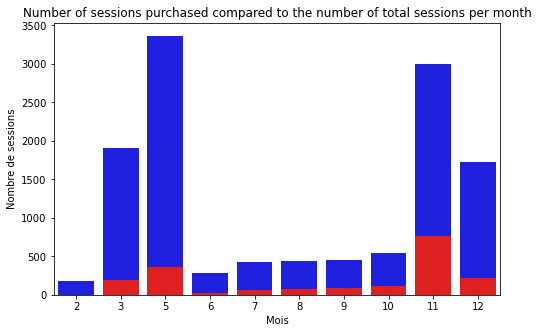

In [191]:
ax = plt.subplots()
 
ax = sns.barplot(x=parmoiscount["mois"], y=parmoiscount["revenue_values"], color='b')
ax = sns.barplot(x=parmois["mois"], y=parmois["revenue_values"], color='r')

ax.set(xlabel="Mois", ylabel="Nombre de sessions")
ax.set(title='Number of sessions purchased compared to the number of total sessions per month')

plt.show()


In red we can see the number of sessions that end in a purchase per month and in blue the total number of sessions per month

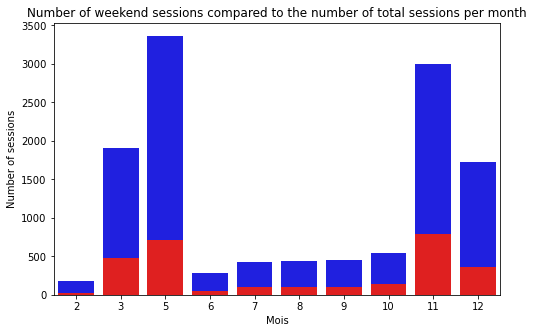

In [192]:
ax = plt.subplots()

ax = sns.barplot(x=parmoiscount["mois"], y=parmoiscount["revenue_values"], color='b')
ax = sns.barplot(x=parmois["mois"], y=parmois["weekend_values"], color='r')

ax.set(xlabel="Mois", ylabel="Number of sessions")
ax.set(title='Number of weekend sessions compared to the number of total sessions per month')
plt.show()

In red, these are the sessions that took place over the weekend and in blue the total sessions

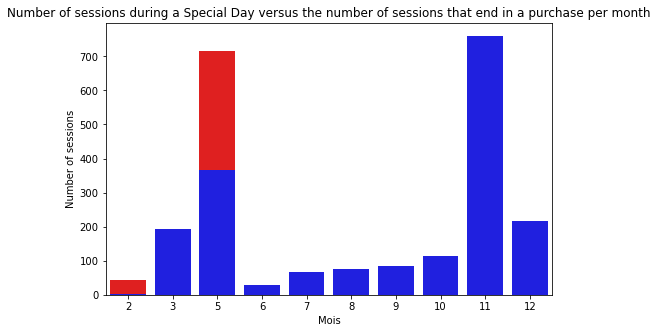

In [193]:
ax = plt.subplots()

ax = sns.barplot(x=parmois["mois"], y=parmois["SpecialDay"], color='r')
ax = sns.barplot(x=parmois["mois"], y=parmois["revenue_values"], color='b')

ax.set(xlabel="Mois", ylabel="Number of sessions")
ax.set(title="Number of sessions during a Special Day versus the number of sessions that end in a purchase per month")
plt.show()

We note that the Special Days are only in February and May, and that they are not necessarily correlated to the number of sessions that end in a purchase.

In [194]:
nAchat = df_norm3['revenue_values'].values == 0
df_nachat= df_norm3[nAchat]
df_nachat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,mois,weekend_values,revenue_values,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,0,0.0,0.000000,2,0,0,0.951057,0.309017
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,0,0.0,0.022679,2,0,0,0.951057,0.309017
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,0,0.0,0.000000,2,0,0,0.951057,0.309017
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,0,0.0,0.000945,2,0,0,0.951057,0.309017
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,True,False,0,0.0,0.044472,2,1,0,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,True,False,0.0308524,0.0,0.023853,12,1,0,0.951057,0.309017
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,True,False,0,0.0,0.066017,11,1,0,0.587785,0.809017
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,True,False,0,0.0,0.021764,11,1,0,0.587785,0.809017
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,0.0119686,0.0,0.016348,11,0,0,0.587785,0.809017


In [195]:
Achat = df_norm3['revenue_values'].values == 1
df_achat= df_norm3[Achat]
df_achat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,mois,weekend_values,revenue_values,month_sin,month_cos
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,...,False,True,0.0186887,0.000000,0.020955,2,0,1,0.951057,0.309017
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,...,False,True,0.0641942,0.000000,0.041565,2,0,1,0.951057,0.309017
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,...,True,True,0.00973446,0.000000,0.022642,2,1,1,0.951057,0.309017
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,...,False,True,0.00790814,0.027278,0.027030,3,0,1,0.951057,-0.309017
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,...,False,True,0.0178731,0.080990,0.027119,3,0,1,0.951057,-0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,...,True,True,0.0141992,0.000000,0.042917,11,1,1,0.587785,0.809017
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,...,False,True,0.0127277,0.000000,0.023305,12,0,1,0.951057,0.309017
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,...,False,True,0,0.059407,0.022775,11,0,1,0.587785,0.809017
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,...,True,True,0.013711,0.005062,0.036658,11,1,1,0.587785,0.809017


In [196]:
temp = df_achat.groupby('VisitorType').sum()
temp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,Revenue,Moyenne_Informational,Moyenne_ProductRelated,mois,weekend_values,revenue_values,month_sin,month_cos
VisitorType,,,,,,,,,,,,,,,,,,,,,
New_Visitor,930,34075.124842,119,8339.366667,9406,3.689221e+05,0.511442,5.777707,16508.294492,7.8,...,1614,105,422,2.354378,12.353610,3675,105,422,129.797493,75.685365
Other,39,1730.583333,4,420.500000,392,2.013427e+04,0.014815,0.208719,1445.201963,0.0,...,285,1,16,0.118251,0.553228,189,1,16,14.127090,6.444272
Returning_Visitor,5506,192168.321175,1377,101162.735383,82187,3.190752e+06,9.237270,31.324835,34067.204261,36.4,...,5774,393,1470,22.392675,43.886271,12663,393,1470,491.031107,340.270876


In [197]:
temp = df_achat.groupby('VisitorType').sum().reset_index()
fig = px.pie(temp, values = "Revenue", names = 'VisitorType', labels = "VisitorType")
fig.update_traces(textposition='inside', textinfo='percent + label')
fig.update_layout(title = "Type of Visitor who buys", title_y=0.1)

fig.show()

In [198]:
temp2 = df_nachat.groupby('VisitorType').count().reset_index()
temp2

,VisitorType,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Weekend,Revenue,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,mois,weekend_values,revenue_values,month_sin,month_cos
0,New_Visitor,1272,1272,1272,1272,1272,1272,1272,1272,1272,...,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272
1,Other,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
2,Returning_Visitor,9081,9081,9081,9081,9081,9081,9081,9081,9081,...,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081


In [199]:
t = df_nachat.groupby('VisitorType').sum().reset_index()
fig = px.pie(t, values = "Administrative", names = 'VisitorType', labels = "VisitorType")
fig.update_traces(textposition='inside', textinfo='percent + label')
fig.update_layout(title = "Type of visitor who don't buy at the end of the session", title_y=0.1)
fig.show()

Initially, we chose to illustrate the duration spent on the product related (duration of conversion of a product), according to the revenue, that's to say if the product was purchased or not. 
Thus, we will have a notion of the distribution of products purchased in relation to the product consulted.

/Users/baaziaines/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



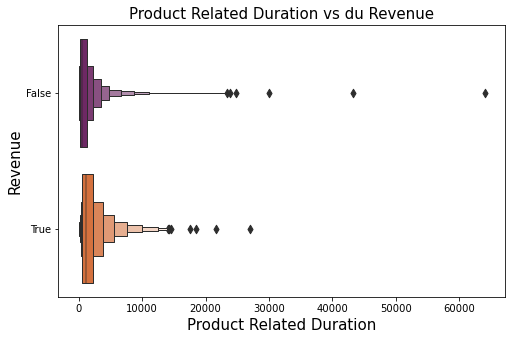

In [200]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df_norm3['ProductRelated_Duration'], df_norm3['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs du Revenue', fontsize = 15)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

We observe that the duration of the relative product is distributed exponentially for the products related (True) or those not purchased (False). 
Also, note that there are many unbought outliers (False), depending on the duration of the product related.

Then, we compare the bounce rate with the exit rate.

/Users/baaziaines/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



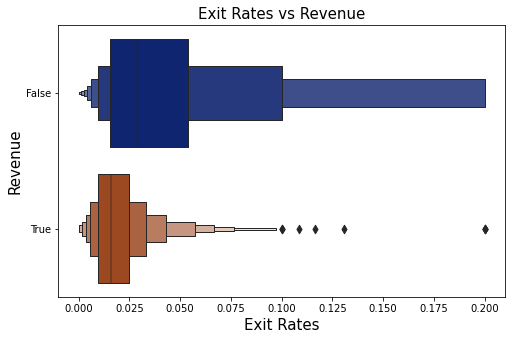

In [201]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df_norm3['ExitRates'], df_norm3['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 15)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

Here we see that the exit rate is normally distributed for buys (True) or not buys (False). (Gaussian) 
There are also a lot of unbought outliers (False) depending on the exit rate.

Now, we'll look at bounce rates compared to the revenue.

/Users/baaziaines/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



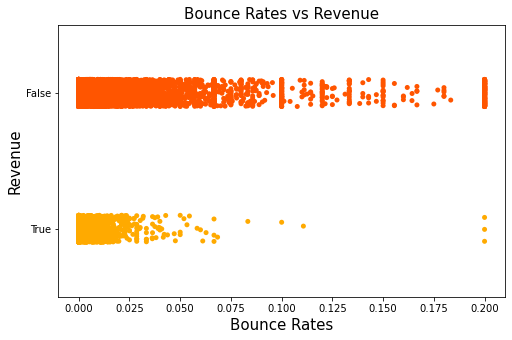

In [202]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df_norm3['BounceRates'], df_norm3['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 15)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

We observe that the bounce rate is distributed exponentially for purchases (True) or not (False). 
We are also in the presence of a good number of outliers not bought (False) according to exit rate. 
Thus, the bounce rate is strongly influenced to buy a product or not.

# Preparation for the modelling

We need to know the columns which are the columns which have the best correlation with our target : Revenue

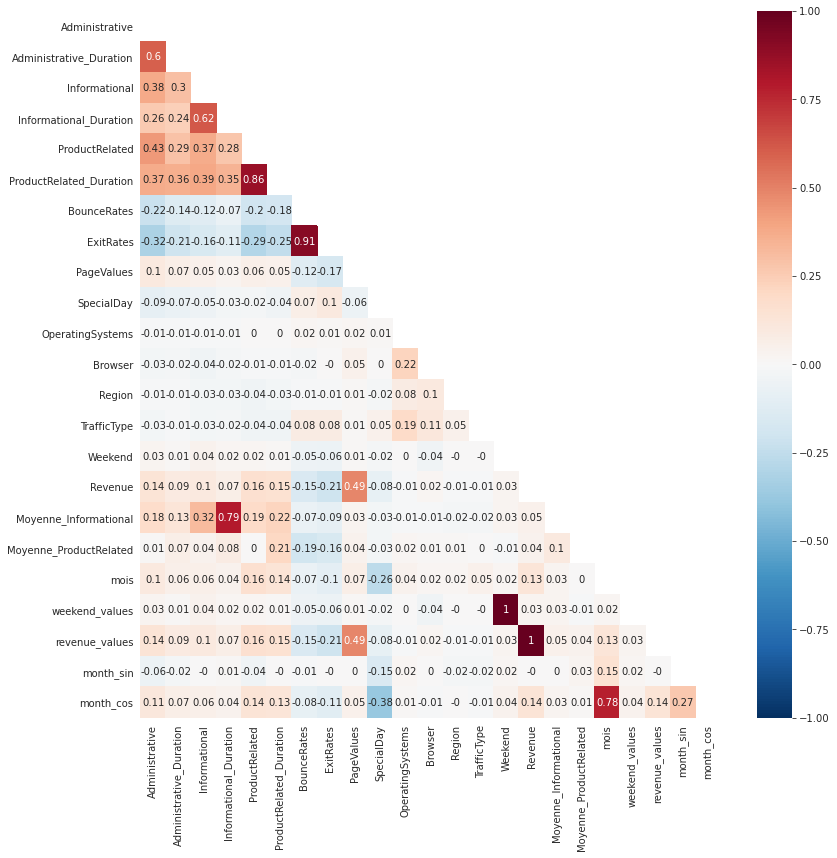

In [203]:
correlation = df_norm3.corr().round(2)

lo = np.zeros_like(correlation)
lo[np.triu_indices_from(lo)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=correlation, mask=lo, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");

So we can see that our target which is "Revenue"has high correlation with : "Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration" and "PageValues".

We drop Revenue because it's the value we want to predict, and we keep the values wich had the high correlation.

In [204]:
new_data=df_norm3.drop(['Revenue','VisitorType','Month','mois','revenue_values','Weekend','BounceRates','ExitRates','SpecialDay','Browser','OperatingSystems','Region','TrafficType'],axis=1)

In [205]:
new_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,Moyenne_Administrative,Moyenne_Informational,Moyenne_ProductRelated,weekend_values,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.000000,0,0.0,0.000000,0,0.951057,0.309017
1,0,0.0,0,0.0,2,64.000000,0.000000,0,0.0,0.022679,0,0.951057,0.309017
2,0,0.0,0,0.0,1,0.000000,0.000000,0,0.0,0.000000,0,0.951057,0.309017
3,0,0.0,0,0.0,2,2.666667,0.000000,0,0.0,0.000945,0,0.951057,0.309017
4,0,0.0,0,0.0,10,627.500000,0.000000,0,0.0,0.044472,1,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,12.241717,0.0308524,0.0,0.023853,1,0.951057,0.309017
12326,0,0.0,0,0.0,5,465.750000,0.000000,0,0.0,0.066017,1,0.587785,0.809017
12327,0,0.0,0,0.0,6,184.250000,0.000000,0,0.0,0.021764,1,0.587785,0.809017
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.0119686,0.0,0.016348,0,0.587785,0.809017


Split the dataset

In [206]:
X=new_data
Y=df_norm3['Revenue']

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

# Modeling 

 We will use Machine Learning concepts to try to understand which model is the best : 

## Support Vector Machine

In [208]:
model_SVC = svm.SVC()
model_SVC.fit(X_train, Y_train)

SVC()

Now we get the prediction of the model

In [209]:
prediction_SVC = model_SVC.predict(X_test)

In [210]:
print("For the training part we have for accurancy: ", model_SVC.score(X_train, Y_train))
print("For the test part we have for accurancy: ", model_SVC.score(X_test, Y_test))

For the training part we have for accurancy:  0.8514801297648013
For the test part we have for accurancy:  0.8317112733171127


Confusion Matrix

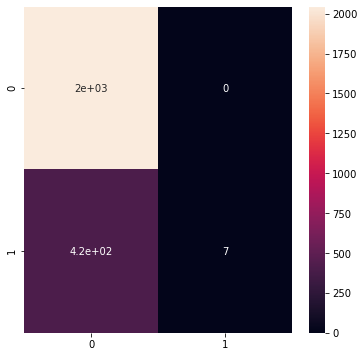

In [211]:
confusion = confusion_matrix(Y_test, prediction_SVC)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusion, annot = True)
plt.show()

In [212]:
cr = classification_report(Y_test, prediction_SVC)
print(cr)

              precision    recall  f1-score   support

       False       0.83      1.00      0.91      2044
        True       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



In [213]:
ac_SVM = accuracy_score(Y_test, prediction_SVC)
ac_SVM

0.8317112733171127

#     Naive Bayes

In [214]:
model = GaussianNB()
model.fit(X_train, Y_train)


GaussianNB()

Now we get the prediction of the model

In [215]:
prediction2 = model.predict(X_test)

In [216]:
prediction2

array([False,  True, False, ...,  True, False,  True])

In [217]:
cr2 = classification_report(Y_test, prediction2)
print(cr2)

              precision    recall  f1-score   support

       False       0.89      0.92      0.91      2044
        True       0.55      0.47      0.51       422

    accuracy                           0.84      2466
   macro avg       0.72      0.70      0.71      2466
weighted avg       0.84      0.84      0.84      2466



In [218]:
ac_NaiveBayes = accuracy_score(Y_test, prediction2)
ac_NaiveBayes

0.8442822384428224

# Random Forest Classification

In [219]:
model_Random = RandomForestClassifier()
model_Random.fit(X_train, Y_train)

RandomForestClassifier()

In [220]:
prediction_random = model.predict(X_test)

In [221]:
prediction_random

array([False,  True, False, ...,  True, False,  True])

In [222]:
cr3 = classification_report(Y_test, prediction_random)
print(cr3)

              precision    recall  f1-score   support

       False       0.89      0.92      0.91      2044
        True       0.55      0.47      0.51       422

    accuracy                           0.84      2466
   macro avg       0.72      0.70      0.71      2466
weighted avg       0.84      0.84      0.84      2466



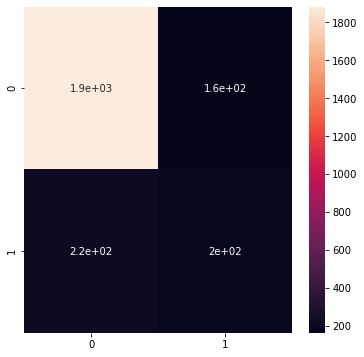

In [223]:
cf_random = confusion_matrix(Y_test, prediction_random)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_random, annot = True)
plt.show()

In [224]:
ac_RFC = accuracy_score(Y_test, prediction_random)
ac_RFC

0.8442822384428224

## K Nearest Neighbour

In [225]:
model_Neighbour = KNeighborsClassifier()
model_Neighbour.fit(X_train, Y_train)

KNeighborsClassifier()

In [226]:
prediction_Neighbour = model_Neighbour.predict(X_test)

In [227]:
prediction_Neighbour

array([False,  True, False, ..., False, False,  True])

In [228]:
cr4 = classification_report(Y_test, prediction_Neighbour)
print(cr4)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      2044
        True       0.66      0.29      0.40       422

    accuracy                           0.85      2466
   macro avg       0.77      0.63      0.66      2466
weighted avg       0.83      0.85      0.83      2466



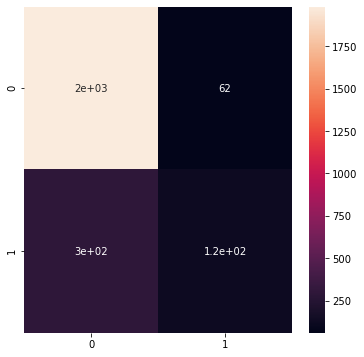

In [229]:
cf_Neighbour = confusion_matrix(Y_test, prediction_Neighbour)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_Neighbour, annot = True)
plt.show()

In [230]:
ac_KNN = accuracy_score(Y_test,  prediction_Neighbour)
ac_KNN

0.8532035685320357

## Logistic Regression

In [231]:
model_Regression = LogisticRegression()
model_Regression.fit(X_train, Y_train)

/Users/baaziaines/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [232]:
prediction_regression = model_Regression.predict(X_test)

In [233]:
prediction_regression

array([False, False, False, ..., False, False,  True])

In [234]:
cr5 = classification_report(Y_test, prediction_regression)
print(cr5)

              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2044
        True       0.72      0.35      0.47       422

    accuracy                           0.86      2466
   macro avg       0.80      0.66      0.69      2466
weighted avg       0.85      0.86      0.84      2466



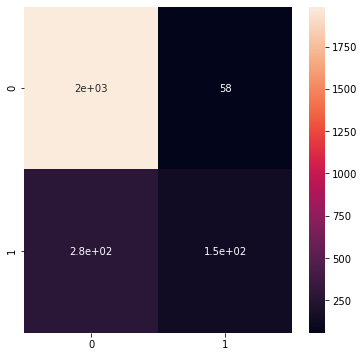

In [235]:
cf_Regression = confusion_matrix(Y_test, prediction_regression)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_Regression, annot = True)
plt.show()

In [236]:
ac_Regression = accuracy_score(Y_test,  prediction_regression)
ac_Regression

0.8645579886455799

## Decision Tree Classification

In [237]:
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [238]:
prediction_decision = model_decision.predict(X_test)

In [239]:
prediction_decision

array([False, False, False, ..., False, False, False])

In [240]:
cr6 = classification_report(Y_test, prediction_decision)
print(cr6)

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2044
        True       0.56      0.55      0.55       422

    accuracy                           0.85      2466
   macro avg       0.74      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466



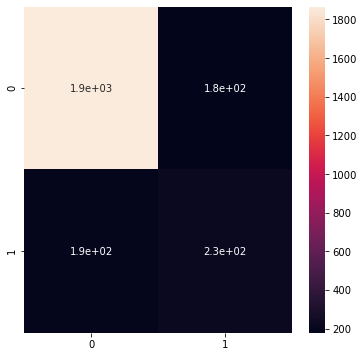

In [241]:
cf_decision = confusion_matrix(Y_test, prediction_decision)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_decision, annot = True)
plt.show()

In [242]:
ac_Decision = accuracy_score(Y_test,  prediction_decision)
ac_Decision

0.8499594484995945

## Gradient Boosting Classification

In [243]:
model_boosting = GradientBoostingClassifier()
model_boosting.fit(X_train, Y_train)

GradientBoostingClassifier()

In [244]:
prediction_boosting = model_boosting.predict(X_test)

In [245]:
prediction_boosting

array([False, False, False, ..., False, False,  True])

In [246]:
cr7 = classification_report(Y_test, prediction_boosting)
print(cr7)

              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2044
        True       0.71      0.58      0.64       422

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.79      2466
weighted avg       0.88      0.89      0.88      2466



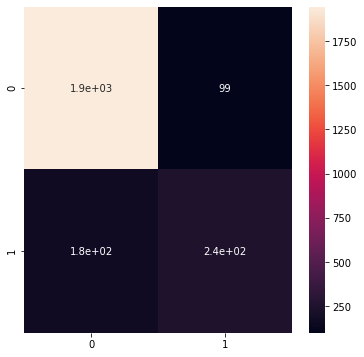

In [247]:
cf_boosting = confusion_matrix(Y_test, prediction_boosting)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_boosting, annot = True)
plt.show()

In [248]:
ac_Boosting = accuracy_score(Y_test,  prediction_boosting)
ac_Boosting

0.8876723438767234

## Linear Discriminant Analysis

In [249]:
model_linear = LinearDiscriminantAnalysis()
model_linear.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [250]:
prediction_linear = model_linear.predict(X_test)

In [251]:
prediction_linear

array([False, False, False, ..., False, False,  True])

In [252]:
cr8 = classification_report(Y_test, prediction_linear)
print(cr8)

              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2044
        True       0.71      0.29      0.41       422

    accuracy                           0.86      2466
   macro avg       0.79      0.63      0.66      2466
weighted avg       0.84      0.86      0.83      2466



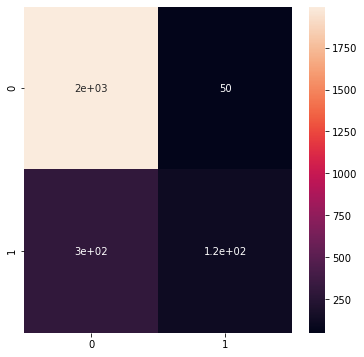

In [253]:
cf_linear = confusion_matrix(Y_test, prediction_linear)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_linear, annot = True)
plt.show()

In [254]:
ac_linear = accuracy_score(Y_test,  prediction_linear)
ac_linear

0.8576642335766423

## Setting the hyperparameters with RandomForestClassifier

In [255]:
plage_max_features = np.arange(1,6,1)

In [256]:
plage_n_estimators = np.arange(10,210,10)

Construction of the grid

In [257]:
construction_grid = dict(max_features=plage_max_features, n_estimators=plage_n_estimators)

We initialise the algo which we want to affine 

In [258]:
affine = RandomForestClassifier()

In [259]:
my_grid = GridSearchCV(estimator=affine, param_grid=construction_grid, cv=5, n_jobs=-1,verbose=True)

For our dataset

In [260]:
my_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
             verbose=True)

In [261]:
print("Optimal parameters %s accuracy score of  %0.2f"
      % (my_grid.best_params_, my_grid.best_score_))

Optimal parameters {'max_features': 4, 'n_estimators': 170} accuracy score of  0.90


With best parameters

In [262]:
best_parameters = RandomForestClassifier( 
                               max_features=3,  
                               n_estimators=80)

In [278]:
best_parameters.fit(X_train, Y_train)
best_acc_rf=best_parameters.score(X_test,Y_test)

## With Gradient Boosting

In [264]:
affine2 = GradientBoostingClassifier()

In [265]:
my_grid2 = GridSearchCV(estimator=affine2, param_grid=construction_grid, cv=5, n_jobs=-1,verbose=True)

For our dataset

In [266]:
my_grid2.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
             verbose=True)

In [267]:
print("Optimal parameters %s accuracy score of  %0.2f"
      % (my_grid2.best_params_, my_grid2.best_score_))

Optimal parameters {'max_features': 5, 'n_estimators': 40} accuracy score of  0.90


With best parameters

In [268]:
best_parameters2 = GradientBoostingClassifier( 
                               max_features=5,  
                               n_estimators=190)

In [279]:
best_parameters2.fit(X_train, Y_train)
best_acc_gb=best_parameters2.score(X_test,Y_test)

In [270]:
name_models = ['SVM','NB','RFC', 'KNN', 'LR', 'DTC','GBC','LDA']

In [271]:
acc =[ac_SVM,ac_NaiveBayes,ac_RFC,ac_KNN,ac_Regression ,ac_Decision ,ac_Boosting ,ac_linear]
acc

[0.8317112733171127,
 0.8442822384428224,
 0.8442822384428224,
 0.8532035685320357,
 0.8645579886455799,
 0.8499594484995945,
 0.8876723438767234,
 0.8576642335766423]

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<AxesSubplot:xlabel='Models', ylabel='Acc'>

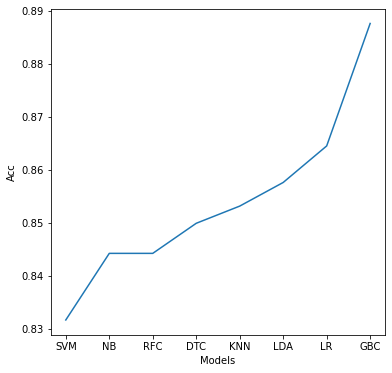

In [273]:
Model_acc = pd.DataFrame({'Models':name_models, 'Acc':acc})

Model_acc = Model_acc.sort_values(by = 'Acc')
sns.lineplot(x='Models', y='Acc', data = Model_acc)

In [274]:
name_models_duo = ['RFC','GBC']

In [280]:
acc_duo =[best_acc_rf,best_acc_gb]
acc_duo

[0.8905109489051095, 0.8876723438767234]

<AxesSubplot:xlabel='Model', ylabel='Acc'>

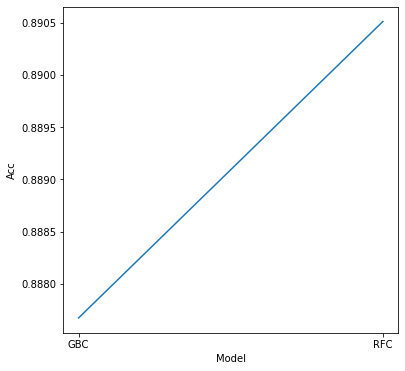

In [281]:
Model_duo = pd.DataFrame({'Model':name_models_duo, 'Acc':acc_duo})

Model_d = Model_duo.sort_values(by = 'Acc')
sns.lineplot(x='Model', y='Acc', data = Model_d)

## Compare this two models

For the Gradient Boosting

In [ ]:
first_model_with_bp = best_parameters2.fit(X_train, Y_train)

In [ ]:
first_prediction=first_model_with_bp.predict(X_test)

In [ ]:
first_prediction

In [ ]:
cf_prediction_bp = confusion_matrix(Y_test, first_prediction)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_linear, annot = True)
plt.show()

 For RandomForestClassifier

In [ ]:
second_model_with_bp = best_parameters.fit(X_train, Y_train)

In [ ]:
second_prediction=second_model_with_bp.predict(X_test)

In [ ]:
second_prediction

In [ ]:
cf_prediction_bp2 = confusion_matrix(Y_test, second_prediction)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cf_linear, annot = True)
plt.show()

# Exporting for the API

In [ ]:
import pickle 

In [ ]:
best_RandomF=my_grid.best_estimator_

In [ ]:
pickle.dump(best_RandomF, open("model.pkl",'wb'))

In [ ]:
model=pickle.load(open("model.pkl",'rb'))